![wine_chalkboard](https://user-images.githubusercontent.com/19881320/54493655-d8c4ea00-48a8-11e9-8b50-28394f91ba62.jpg)

<h1><center>Wine Review Analysis<center></h1>

<h2><center>Team Pura Pythonic Vida</center></h2>

<p align="center">
  <img width="180" src="https://user-images.githubusercontent.com/19881320/54484151-b85c4780-4836-11e9-923f-c5e0e5afe866.jpg">
</p>


## Contact Information

William Ponton: [LinkedIn](https://www.linkedin.com/in/williampontoncfsp/) 

Email: [@gorbulus](waponton@gmail.com)

REPL: [@gorbulus](https://repl.it/@gorbulus)

Github: [gorbulus](https://github.com/gorbulus)

## Wine Review Analysis

Started: 2.17.19

Completed: 3.17.19

## Project goals

0.0 Import and inspect the dataset using ```pandas```.</br>

1.0 Analyze the dataset using ```pandas``` and ```numpy```.</br>

2.0 Create visualizations using ```matplotlib``` and ```seaborn```.</br>

3.0 Interpret meanings from the data using the ```Scientific Method``` ("Data Science!").</br>

# Data Science Libraries

To get everything running in this project:

```pip install -r requirements.txt```

First, we will grab the industry standard Data Science libraries to analyze the dataset of 150,930 records.

Python convention is important to follow, so we will use the standard aliases for each of the libraries (for example: ```numpy as np```).

- Analysis tools
    - NumPy
    - Pandas
- Visualization tools
    - Matplotlib
    - Seaborn
    - Bokeh

## Import Modules

In [1]:
# Import modules
import numpy as np
import pandas as pd
import seaborn as sns
import bokeh as bk
from bokeh.io import output_notebook, show
output_notebook()

Loading BokehJS ...

In Jupyter Notebooks, we can declare ```%matplotlib inline``` to contain the ```matplotlib``` charts to the notebook's directory.

In [2]:
%matplotlib inline
# Inline matplotlib (keep charts in this nb)
import matplotlib.pyplot as plt

Ignore irrelevant warnings for a clean presentation.  All code is working and functional.

In [3]:
import warnings
warnings.filterwarnings('ignore')
# This was a warning on the KDE Plot for 2D topo mappings

# 0.0 Import & Inspect the Dataset

The data is located in the ```app_data/winemag-data_first150k.csv``` CSV file.
We can use the ```read_csv()``` method in the Pandas library to load the contents of the CSV file into a Pandas ```DataFrame()``` object.  Python uses the ```index_col``` parameter to tell the Pandas ```read_csv``` method that the first line of information in the file contains the names of the DataFrame columns delineated by a comma (",").  We can also use custom column names by passing a list of strings to the ```names``` argument in the method.  ```read_csv``` will assign each string from the list to the column in the CSV file for display.

## Data Columns

1. Country  - The country of origin of the wine.

2. Description - The description of the wine's flavor profile.

3. Designation - The vineyard where the wine's grapes are sourced.

4. Points - The number of points Wine Enthusiast  Magazine rated the wine on a scale of 1-100.

5. Price - The cost for a single bottle of the wine.

6. Province - The province or state that the wine is from.

7. Region 1 - The wine growing area in a province or state (for example, Napa Valley in California).

8. Region 2 - (Optional) A more specific region in a wine growing area (for example, Rutherford inside Napa Valley).

9. Variety - The type of grapes used to make the wine (for example, Pinot Noir).

10. Winery - The winery that made the wine.

In [4]:
# A list of the column names to be displayed:
column_names = ["Index", "Country", "Description", "Designation", "Points", "Price", 
             "Province", "Region_1", "Region_2", "Variety", "Winery"]

In [5]:
# Reading the CSV file using the col_names list in the names parameter:
reviews_df = pd.read_csv("app_data/winemag-data_first150k.csv", sep=",", header=1, 
                        names = column_names, index_col=0)

The ```.shape()``` method displays a tuple of the (rows, columns) in the dataframe.

Here we can quickly check that all the records have loaded (about 150,930)

In [6]:
# Dataframe shape
shape = reviews_df.shape
print("The shape of the dataframe (rows, columns):\t {}".format(shape))

The shape of the dataframe (rows, columns):	 (150929, 10)


We can use the ```.head()``` method to display the "head" of the dataset after it has been converted to a Pandas ```DataFrame``` object, ```reviews_df```.

In [7]:
# Display the first ten records:
reviews_df.head(10)

,Country,Description,Designation,Points,Price,Province,Region_1,Region_2,Variety,Winery
Index,,,,,,,,,,
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia
6,Spain,Slightly gritty black-fruit aromas include a s...,San Román,95,65.0,Northern Spain,Toro,NaN,Tinta de Toro,Maurodos
7,Spain,Lush cedary black-fruit aromas are luxe and of...,Carodorum Único Crianza,95,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström
9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm


### Data Types

Using the ```.info()``` method in ```pandas``` displays:

```Column name | Review Count | NULL | DataType```

- ```non-null``` represents a required column for the dataframe object
- The data type "object" represents a string or a NaN (or np.Null) value)

```.info()``` ends with a sum of the different data types:

```dtypes: float(1), int64(1), object(8)```

In [8]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150929 entries, 1 to 150929
Data columns (total 10 columns):
Country        150924 non-null object
Description    150929 non-null object
Designation    105194 non-null object
Points         150929 non-null int64
Price          137234 non-null float64
Province       150924 non-null object
Region_1       125869 non-null object
Region_2       60952 non-null object
Variety        150929 non-null object
Winery         150929 non-null object
dtypes: float64(1), int64(1), object(8)
memory usage: 12.7+ MB


We can also use ```.dtypes``` to display only the datatypes.  Here the datatype of the ```DataFrame()``` object are also included.

In [9]:
# Dislpays the datatypes of the reviews_df DataFrame objectL
reviews_df.dtypes

Country         object
Description     object
Designation     object
Points           int64
Price          float64
Province        object
Region_1        object
Region_2        object
Variety         object
Winery          object
dtype: object

### Handling null values

Now we need to deal with those pesky (Not a Number) ```NaN``` and ```np.null``` values and calculate the percentage of missing.

First we can see if any of the columns has missing data using ```.isnull().any()```

In [10]:
# Boolean - True if column has null value, False if no null values:
reviews_df.isnull().any()

Country         True
Description    False
Designation     True
Points         False
Price           True
Province        True
Region_1        True
Region_2        True
Variety        False
Winery         False
dtype: bool

The following columns have values where ```.isnull()``` evaluates to ```True```:

- Country
- Designation
- Price
- Province
- Region_1
- Region_2


Next, we can see the sum of missing values in each column.

In [11]:
# The sum of null values per column:
reviews_df.isnull().sum()

Country            5
Description        0
Designation    45735
Points             0
Price          13695
Province           5
Region_1       25060
Region_2       89977
Variety            0
Winery             0
dtype: int64

We will allow ```Designation, Region_1, Region_2``` to have a substitute value, but will want to handle the missing Prices and Country records.

 #### Country
 First, let's drop the 5 records that are missing the Country value.  They represent a very small sample of the dataset, and won't affect the results.

In [12]:
# Find the null values in the Country column:
reviews_df[reviews_df.Country.isnull()]

,Country,Description,Designation,Points,Price,Province,Region_1,Region_2,Variety,Winery
Index,,,,,,,,,,
1133,NaN,Delicate white flowers and a spin of lemon pee...,Askitikos,90,17.0,NaN,NaN,NaN,Assyrtiko,Tsililis
1440,NaN,"A blend of 60% Syrah, 30% Cabernet Sauvignon a...",Shah,90,30.0,NaN,NaN,NaN,Red Blend,Büyülübağ
68226,NaN,"From first sniff to last, the nose never makes...",Piedra Feliz,81,15.0,NaN,NaN,NaN,Pinot Noir,Chilcas
113016,NaN,"From first sniff to last, the nose never makes...",Piedra Feliz,81,15.0,NaN,NaN,NaN,Pinot Noir,Chilcas
135696,NaN,"From first sniff to last, the nose never makes...",Piedra Feliz,81,15.0,NaN,NaN,NaN,Pinot Noir,Chilcas


In [13]:
# Confirm dataframe shape
reviews_df.shape

(150929, 10)

In [14]:
# Drop the records with null values for "Country", update the reviews_df dataframe:
reviews_df = reviews_df.dropna(how="any", subset=["Country"])

In [15]:
# Confirm null values have been dropped:
reviews_df.shape

(150924, 10)

In [16]:
# Display confirmation of no records with "Country" null values:
reviews_df[reviews_df.Country.isnull()]

,Country,Description,Designation,Points,Price,Province,Region_1,Region_2,Variety,Winery
Index,,,,,,,,,,


#### Price

Next, we will calculate the impact of dropping the missing prices from the dataset.

In [17]:
reviews_df.isnull().sum()

Country            0
Description        0
Designation    45735
Points             0
Price          13695
Province           0
Region_1       25055
Region_2       89972
Variety            0
Winery             0
dtype: int64

In [18]:
# Calculate the percentage of remaining records if missing prices are dropped:
total_records = len(reviews_df)
missing_prices = reviews_df["Price"].isnull().sum()
missing_ratio = 100 - ((missing_prices / total_records) * 100)
print("Missing prices: {}".format(missing_prices)+ "\n" +
      "Total records: {}".format(total_records) + "\n" + 
      "Percentage remaining: {:.2f}%".format(missing_ratio))

Missing prices: 13695
Total records: 150924
Percentage remaining: 90.93%


If we remove all the records with missing prices, we are left with 90.93% of the dataset.  We can safely drop the records with missing values and not affect the results dramatically.

In [19]:
# Confirm dataframe shape
reviews_df.shape

(150924, 10)

In [20]:
# Drop the records with null values for "Price", update the reviews_df dataframe:
reviews_df = reviews_df.dropna(how="any", subset=["Price"])

In [21]:
# Confirm the null values have been dropped
reviews_df.shape

(137229, 10)

In [22]:
# Display confirmation of no records with "Price" null values:
reviews_df[reviews_df.Price.isnull()]

,Country,Description,Designation,Points,Price,Province,Region_1,Region_2,Variety,Winery
Index,,,,,,,,,,


Finally, we can calculate the percentage of rows with zero null values compared to the entire dataset.

The rows with 100% of the columns completed might be useful to split for a training dataset in a later project.

In [23]:
# How many rows have zero null values in any column?
complete = reviews_df[reviews_df.isnull().any(axis=1)].shape
print("Records without null values:\n(rows, columns)\t {}".format(complete))

Records without null values:
(rows, columns)	 (97989, 10)


In [24]:
# Calculate the percentage of fully complete rows in the dataset:
complete_rows = int(complete[0])
total_rows = len(reviews_df)

# Calulations
completion_ratio = ((complete_rows / total_rows) * 100)

print("Total complete records: \t\t{}".format(complete_rows))
print("Total records: \t\t\t\t{}".format(total_rows))
print("Completion ratio: \t\t\t{:.2f}%".format(completion_ratio))

Total complete records: 		97989
Total records: 				137229
Completion ratio: 			71.41%


Now we have completed inspecting and cleaning the dataset, and can move on to the Analysis of the data.

# 1.0 Analyze the DataFrame

### Drill Down

In this section we will look deeper into the contents of the ```reviews_df``` DataFrame object using ```pandas```.  We will use common ```pandas``` methods to build the case for some meaningful interpretations later.

We will target the Country, Price, Points, and Variety.
Data Questions:
1. Which country had the most reviews?

Describe the columns:

In [94]:
reviews_df["Country"].describe()

count     137229
unique        46
top           US
freq       62138
Name: Country, dtype: object

In [95]:
reviews_df["Designation"].describe()

count       94918
unique      28343
top       Reserve
freq         2704
Name: Designation, dtype: object

In [ ]:
reviews_df["Points"].describe()

In [96]:
reviews_df["Price"].describe()

count    137229.000000
mean         33.130548
std          36.319116
min           4.000000
25%          16.000000
50%          24.000000
75%          40.000000
max        2300.000000
Name: Price, dtype: float64

In [97]:
reviews_df["Province"].describe()

count         137229
unique           446
top       California
freq           44355
Name: Province, dtype: object

In [98]:
reviews_df["Region_1"].describe()

count          114392
unique           1197
top       Napa Valley
freq             6190
Name: Region_1, dtype: object

In [99]:
reviews_df["Region_2"].describe()

count             60703
unique               18
top       Central Coast
freq              12987
Name: Region_2, dtype: object

In [100]:
reviews_df["Variety"].describe()

count         137229
unique           619
top       Chardonnay
freq           13775
Name: Variety, dtype: object

In [101]:
reviews_df["Winery"].describe()

count              137229
unique              13851
top       Williams Selyem
freq                  371
Name: Winery, dtype: object

In [102]:
# Standard Deviation of the DataFrame
reviews_df.std()

Points     3.221507
Price     36.319116
dtype: float64

#### Country

In [72]:
# Total amount of Countries featured in the reviews:
total_countries = reviews_df["Country"].unique()
print("Number of Countries reviewed: {}".format(len(total_countries)))

Number of Countries reviewed: 46


In [73]:
# The unique countries in the reviews:
print("Total amount of unique countries: {}".format(len(reviews_df["Country"].unique())))
reviews_df["Country"].unique()

Total amount of unique countries: 46


array(['Spain', 'US', 'France', 'Italy', 'New Zealand', 'Bulgaria',
       'Argentina', 'Australia', 'Portugal', 'Israel', 'South Africa',
       'Greece', 'Chile', 'Morocco', 'Romania', 'Germany', 'Canada',
       'Moldova', 'Hungary', 'Austria', 'Croatia', 'Slovenia', 'India',
       'Turkey', 'Macedonia', 'Lebanon', 'Serbia', 'Uruguay',
       'Switzerland', 'Albania', 'Bosnia and Herzegovina', 'Brazil',
       'Cyprus', 'Lithuania', 'Japan', 'China', 'South Korea', 'Ukraine',
       'England', 'Mexico', 'Georgia', 'Montenegro', 'Luxembourg',
       'Slovakia', 'Czech Republic', 'US-France'], dtype=object)

In [75]:
# Total wine reviews per country (Top 25)
reviews_df["Country"].value_counts().head(25)

US              62138
Italy           18784
France          14785
Spain            8160
Chile            5766
Argentina        5587
Australia        4894
Portugal         4176
New Zealand      3070
Austria          2483
Germany          2347
South Africa     2237
Greece            872
Israel            610
Hungary           230
Canada            194
Romania           139
Uruguay            85
Croatia            83
Slovenia           81
Bulgaria           77
Moldova            71
Mexico             63
Turkey             50
Georgia            43
Name: Country, dtype: int64

In [114]:
# Group country by 
reviews_df.groupby("Country").Variety.max()

Country
Albania                           Kallmet
Argentina                     White Blend
Australia                       Zinfandel
Austria                          Zweigelt
Bosnia and Herzegovina             Vranec
Brazil                             Tannat
Bulgaria                      White Blend
Canada                        White Blend
Chile                         White Blend
China                         White Blend
Croatia                          Zweigelt
Cyprus                          Xynisteri
Czech Republic             Welschriesling
England                   Sparkling Blend
France                        White Blend
Georgia                       White Blend
Germany                       White Blend
Greece                          Xinomavro
Hungary                       White Blend
India                              Shiraz
Israel                          Zinfandel
Italy                             Zibibbo
Japan                               Koshu
Lebanon                   

In [115]:
# Group points per country - count, min, max points:
reviews_df.groupby(['Country']).Points.agg([len, min, max])

,len,min,max
Country,,,
Albania,2,88,88
Argentina,5587,80,97
Australia,4894,80,100
Austria,2483,81,98
Bosnia and Herzegovina,4,83,88
Brazil,25,81,88
Bulgaria,77,80,90
Canada,194,82,93
Chile,5766,80,95


In [137]:
# Sum Reviews per Country + Region
reviews_df.Country + " - " + reviews_df.Region_1

Index
1                           Spain - Toro
2                    US - Knights Valley
3                 US - Willamette Valley
4                        France - Bandol
5                           Spain - Toro
6                           Spain - Toro
7                           Spain - Toro
8                US - Chehalem Mountains
9                      US - Sonoma Coast
10                        Italy - Collio
11                     US - Ribbon Ridge
12                     US - Dundee Hills
13                      France - Madiran
14                     US - Dundee Hills
15                US - Willamette Valley
16        US - Diamond Mountain District
17              Spain - Ribera del Duero
18                       France - Cahors
19                     US - Sonoma Coast
20                      US - Napa Valley
21                         Spain - Rioja
22                          Spain - Toro
23                      US - Edna Valley
24             US - Santa Cruz Mountains
25        

#### Pricing

In [120]:
# The most expensive wine
max_price = reviews_df['Price'].max()
print("The most expensive wine in all the reviews cost ${:.2f}".format(max_price))

The most expensive wine in all the reviews cost $2300.00


In [121]:
# The average wine cost
avg_price = reviews_df['Price'].mean()
print("The average bottle in the reviews cost ${:.2f} USD".format(avg_price))

The average bottle in the reviews cost $33.13 USD


In [122]:
# The cheapest wine cost
min_price = reviews_df['Price'].min()
print("The cheapest bottle in the reviews cost ${:.2f} USD".format(min_price))

The cheapest bottle in the reviews cost $4.00 USD


In [124]:
# Group by price - aum the reviews for each price
reviews_df.groupby("Country").Price.count()

Country
Albania                       2
Argentina                  5587
Australia                  4894
Austria                    2483
Bosnia and Herzegovina        4
Brazil                       25
Bulgaria                     77
Canada                      194
Chile                      5766
China                         3
Croatia                      83
Cyprus                       31
Czech Republic                6
England                       8
France                    14785
Georgia                      43
Germany                    2347
Greece                      872
Hungary                     230
India                         8
Israel                      610
Italy                     18784
Japan                         2
Lebanon                      37
Lithuania                     8
Luxembourg                    9
Macedonia                    16
Mexico                       63
Moldova                      71
Montenegro                    2
Morocco                      12


#### Points

In [131]:
reviews_df.Points.mean()

87.78797484496717

In [132]:
reviews_df.Points.min()

80

In [133]:
reviews_df.Points.max()

100

In [138]:
reviews_df.groupby("Points").Points.count()

Points
80       883
81      1466
82      3933
83      5807
84     10120
85     11604
86     14351
87     19025
88     16034
89     11557
90     14402
91      9211
92      8119
93      5197
94      3007
95      1466
96       566
97       303
98       114
99        40
100       24
Name: Points, dtype: int64

#### Variety

In [126]:
# Number of unique wine varieties in the reviews:
print(reviews_df["Variety"].unique())

['Tinta de Toro' 'Sauvignon Blanc' 'Pinot Noir' 'Provence red blend'
 'Friulano' 'Tannat' 'Chardonnay' 'Cabernet Sauvignon' 'Tempranillo'
 'Malbec' 'Rosé' 'Tempranillo Blend' 'Syrah' 'Mavrud' 'Sparkling Blend'
 'Sangiovese' 'Rhône-style White Blend' 'Red Blend' 'Mencía' 'Palomino'
 'Petite Sirah' 'Riesling' 'Cabernet Sauvignon-Syrah' 'Portuguese Red'
 'Pinot Gris' 'Nebbiolo' 'Meritage' 'Baga' 'Glera' 'Malbec-Merlot'
 'Merlot-Malbec' 'Ugni Blanc-Colombard' 'Viognier'
 'Cabernet Sauvignon-Cabernet Franc' 'Moscato' 'Pinot Grigio'
 'Cabernet Franc' 'White Blend' 'Gamay' 'Zinfandel' 'Greco' 'Barbera'
 'Grenache' 'Rhône-style Red Blend' 'Albariño' 'Malvasia Bianca'
 'Assyrtiko' 'Malagouzia' 'Carmenère' 'Bordeaux-style Red Blend'
 'Touriga Nacional' 'Agiorgitiko' 'Picpoul' 'Godello' 'Gewürztraminer'
 'Merlot' 'Syrah-Grenache' 'G-S-M' 'Mourvèdre' 'Bordeaux-style White Blend'
 'Petit Verdot' 'Muscat' 'Cabernet Sauvignon-Merlot' 'Pinot Bianco'
 'Alvarinho' 'Portuguese White' 'Garganega' 'Sauvign

Chardonnay was the most reviewed wine.

In [130]:
# Sum of reviews per variety (Top 25)
reviews_df["Variety"].value_counts().head(25)

Chardonnay                       13775
Pinot Noir                       13625
Cabernet Sauvignon               12670
Red Blend                         9377
Sauvignon Blanc                   6054
Syrah                             5667
Riesling                          5212
Merlot                            4987
Bordeaux-style Red Blend          4545
Zinfandel                         3794
Malbec                            3085
Sangiovese                        2879
White Blend                       2554
Tempranillo                       2525
Rosé                              2461
Shiraz                            1945
Sparkling Blend                   1820
Portuguese Red                    1812
Nebbiolo                          1529
Rhône-style Red Blend             1455
Cabernet Franc                    1310
Corvina, Rondinella, Molinara     1292
Pinot Gris                        1275
Pinot Grigio                      1270
Viognier                          1255
Name: Variety, dtype: int

In [83]:
# Group country by 
reviews_df.groupby("Country").Variety.max()

Country
Albania                           Kallmet
Argentina                     White Blend
Australia                       Zinfandel
Austria                          Zweigelt
Bosnia and Herzegovina             Vranec
Brazil                             Tannat
Bulgaria                      White Blend
Canada                        White Blend
Chile                         White Blend
China                         White Blend
Croatia                          Zweigelt
Cyprus                          Xynisteri
Czech Republic             Welschriesling
England                   Sparkling Blend
France                        White Blend
Georgia                       White Blend
Germany                       White Blend
Greece                          Xinomavro
Hungary                       White Blend
India                              Shiraz
Israel                          Zinfandel
Italy                             Zibibbo
Japan                               Koshu
Lebanon                   

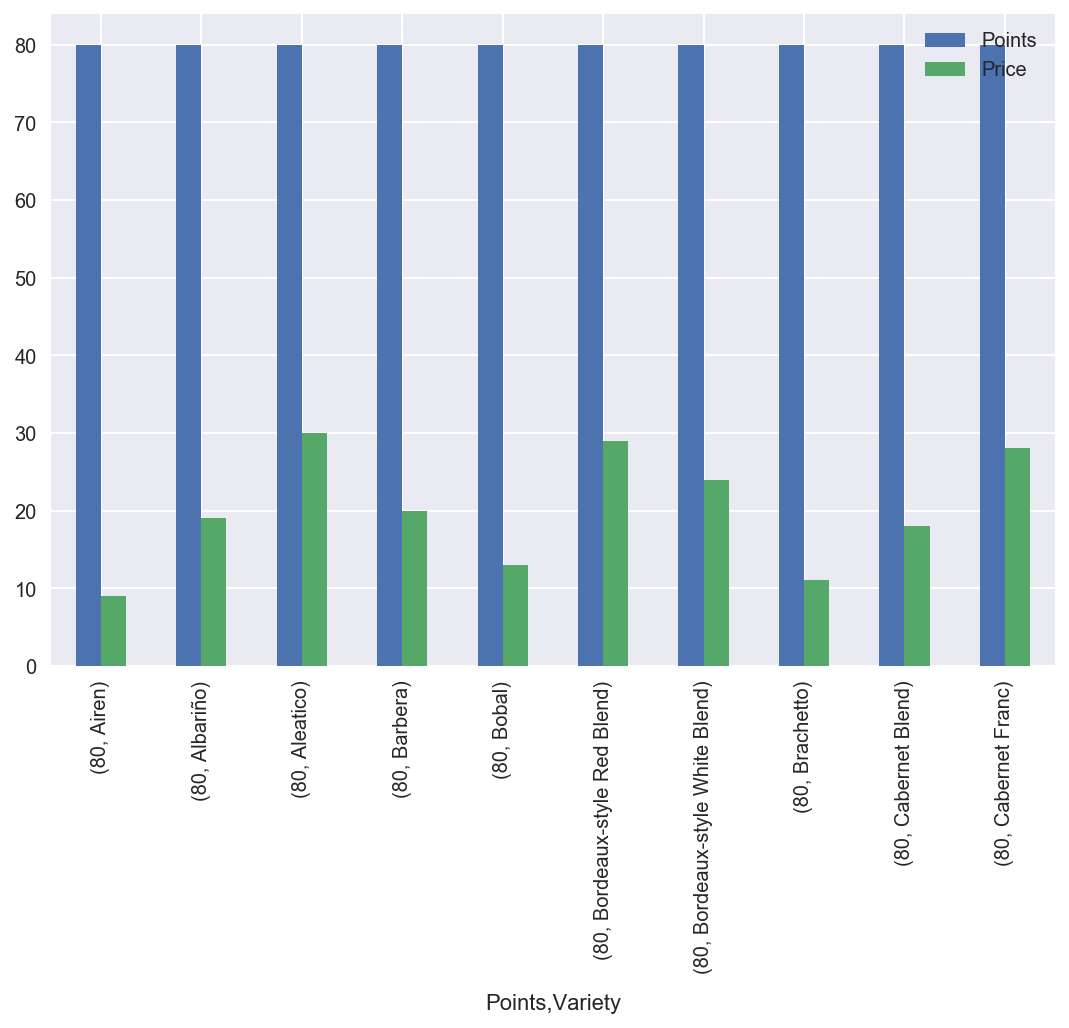

In [140]:
reviews_df.groupby(['Points', 'Variety']).apply(lambda reviews_df: reviews_df.loc[reviews_df.Points.argmax()]).head(10).plot.bar()

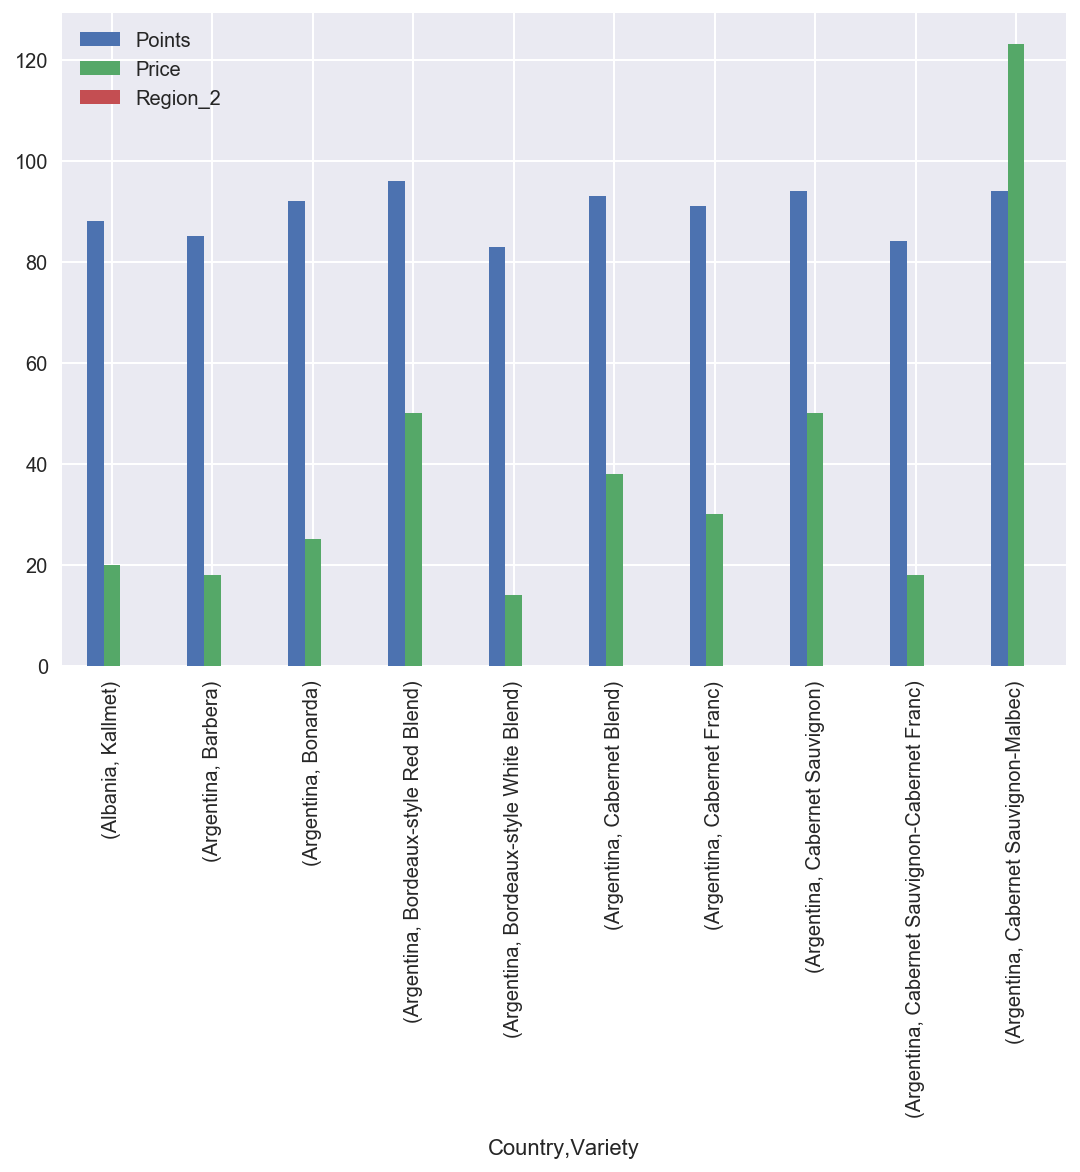

In [141]:
reviews_df.groupby(['Country', 'Variety']).apply(lambda reviews_df: reviews_df.loc[reviews_df.Points.argmax()]).head(10).plot.bar()

#### Wines from a specific country

Let's try some Argentinian wine!

Hmmm... but which one do should we try?!

In [144]:
# Get wine from Argentina~!
reviews_df[reviews_df['Country'].str.match('Argentina')]

,Country,Description,Designation,Points,Price,Province,Region_1,Region_2,Variety,Winery
Index,,,,,,,,,,
60,Argentina,"Concentrated, ripe blackberry and cassis aroma...",The Apple Doesn't Fall Far From The Tree,91,30.0,Mendoza Province,Mendoza,NaN,Malbec,Matias Riccitelli
62,Argentina,Smoky aromas of fresh-cut wood blend with berr...,Alegoría Gran Reserva,91,25.0,Mendoza Province,Mendoza,NaN,Malbec,Navarro Correas
111,Argentina,This copper-tinted rosé of Pinot Noir smells l...,Terroir Único Pinot Noir,86,12.0,Mendoza Province,Tupungato,NaN,Rosé,Zorzal
115,Argentina,"Aromas of prune, raisin and black plum are ful...",Reserva,86,15.0,Mendoza Province,Valle de Uco,NaN,Malbec,Viñalba
184,Argentina,"Dark, minty, inky aromas of blackberry are rug...",Trinità Grand Reserve,88,26.0,Mendoza Province,Luján de Cuyo,NaN,Bordeaux-style Red Blend,Piattelli
190,Argentina,Dark-berry aromas are crisp and show a note of...,Reserve,87,15.0,Mendoza Province,Tupungato,NaN,Malbec,Tupun
269,Argentina,"Immediately this smells raisiny, but with time...",Single Vineyard Reserva,88,15.0,Mendoza Province,Agrelo,NaN,Cabernet Sauvignon,Lamadrid
326,Argentina,"Open-grain oak aromas are out front, followed ...",Alta Barrancas Vineyards,94,50.0,Mendoza Province,Mendoza,NaN,Cabernet Sauvignon,Pascual Toso
455,Argentina,Although this San Juan SB offers almost nothin...,Alma Mora,86,10.0,Other,San Juan,NaN,Sauvignon Blanc,Finca Las Moras


#### Perfect Scores

Let's analyze the wines that were rated 100 points in the review.

100 Points is considered a 'perfect' rating.

In [146]:
# Create a new dataframe for the perfect scores records:
perfect_scores_df = reviews_df[reviews_df['Points'] == 100]
perfect_scores_df

,Country,Description,Designation,Points,Price,Province,Region_1,Region_2,Variety,Winery
Index,,,,,,,,,,
2145,France,"Full of ripe fruit, opulent and concentrated, ...",NaN,100,848.0,Bordeaux,Pessac-Léognan,NaN,Bordeaux-style White Blend,Château Haut-Brion
19354,US,"In a stunning lineup of Cayuse Syrahs, the En ...",En Chamberlin Vineyard,100,65.0,Oregon,Walla Walla Valley (OR),Oregon Other,Syrah,Cayuse
19355,Australia,Not a Cellar Selection in the traditional sens...,Rare,100,300.0,Victoria,Rutherglen,NaN,Muscat,Chambers Rosewood Vineyards
24151,Italy,"A perfect wine from a classic vintage, the 200...",Masseto,100,460.0,Tuscany,Toscana,NaN,Merlot,Tenuta dell'Ornellaia
26296,France,A wine that has created its own universe. It h...,Clos du Mesnil,100,1400.0,Champagne,Champagne,NaN,Chardonnay,Krug
28954,Italy,"This small, family-run estate in the heart of ...",Guado de' Gemoli,100,195.0,Tuscany,Bolgheri Superiore,NaN,Red Blend,Giovanni Chiappini
41521,Italy,"A perfect wine from a classic vintage, the 200...",Masseto,100,460.0,Tuscany,Toscana,NaN,Merlot,Tenuta dell'Ornellaia
51886,France,A wine that has created its own universe. It h...,Clos du Mesnil,100,1400.0,Champagne,Champagne,NaN,Chardonnay,Krug
78004,Italy,"This small, family-run estate in the heart of ...",Guado de' Gemoli,100,195.0,Tuscany,Bolgheri Superiore,NaN,Red Blend,Giovanni Chiappini


Let's look at some of the data in the new dataframe of 'perfect' wines.

In [147]:
# How many records have a score of 100?
perfect_scores_df.shape

(24, 10)

In [149]:
# COunt how many perfect scores per country:
perfect_scores_df["Country"].value_counts()

US           10
Italy         7
France        4
Australia     3
Name: Country, dtype: int64

In [151]:
# Analyze the range in price for perfect score wines by country:
perfect_scores_df.groupby(['Country']).Price.agg([len, min, max])

,len,min,max
Country,,,
Australia,3.0,300.0,300.0
France,4.0,848.0,1400.0
Italy,7.0,195.0,460.0
US,10.0,65.0,245.0


# 2.0 Visualizations

### Styling

Setting plot appearance.  Styling done in ```seaborn``` affectes ```matplotlib``` because it is required for ```seaborn``` plotting.
 
See [here](https://seaborn.pydata.org/tutorial/aesthetics.html) for more options on styling ```seaborn```.

In [48]:
%config InlineBackend.figure_format='retina'
sns.set() # Revert to matplotlib defaults
plt.rcParams['figure.figsize'] = (9, 6)
plt.rcParams['axes.labelpad'] = 10
sns.set_style("darkgrid")
# sns.set_palette("Reds")
# sns.set_context("poster", font_scale=1.0)

### Raw Data

A quick visualization with the ```plot()``` method from ```matplotlib``` to check that everything is working.

```x = reviews_df.index``` 

```y = reviews_df["price"]```

Wall time: 50.2 ms


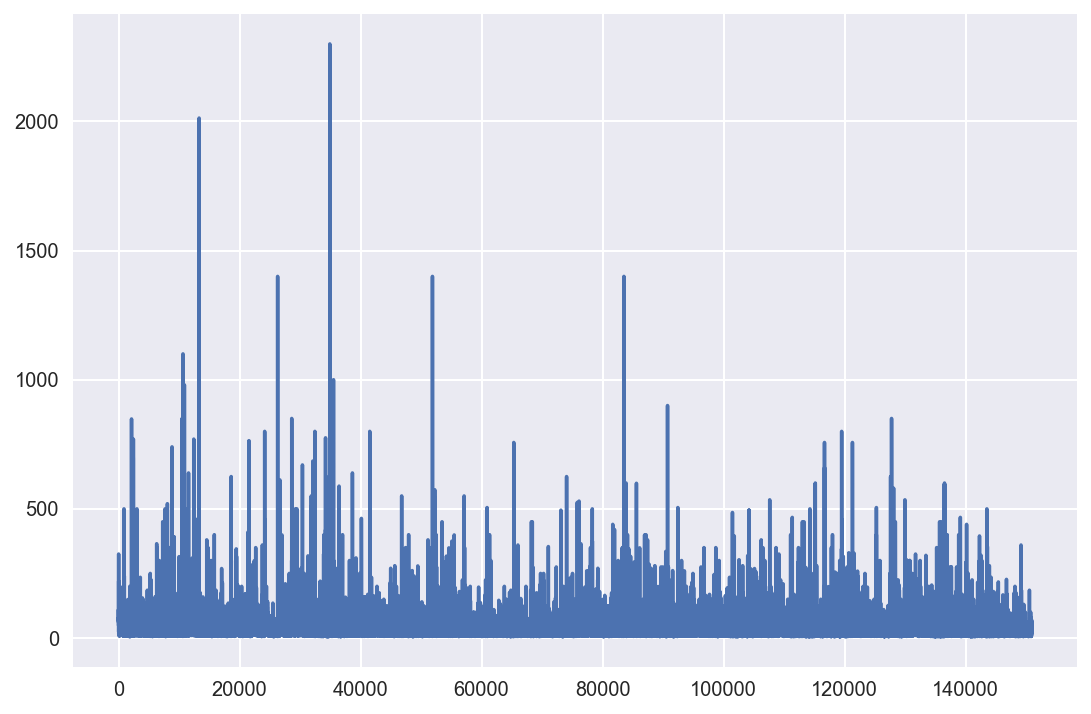

In [49]:
%%time
# Matplotlib to show random order by price
plt.plot(reviews_df.index, reviews_df["Price"])

### Province Totals

This bar graph shows the top ten records for the ```province``` column in the ```reviews_df``` dataframe.

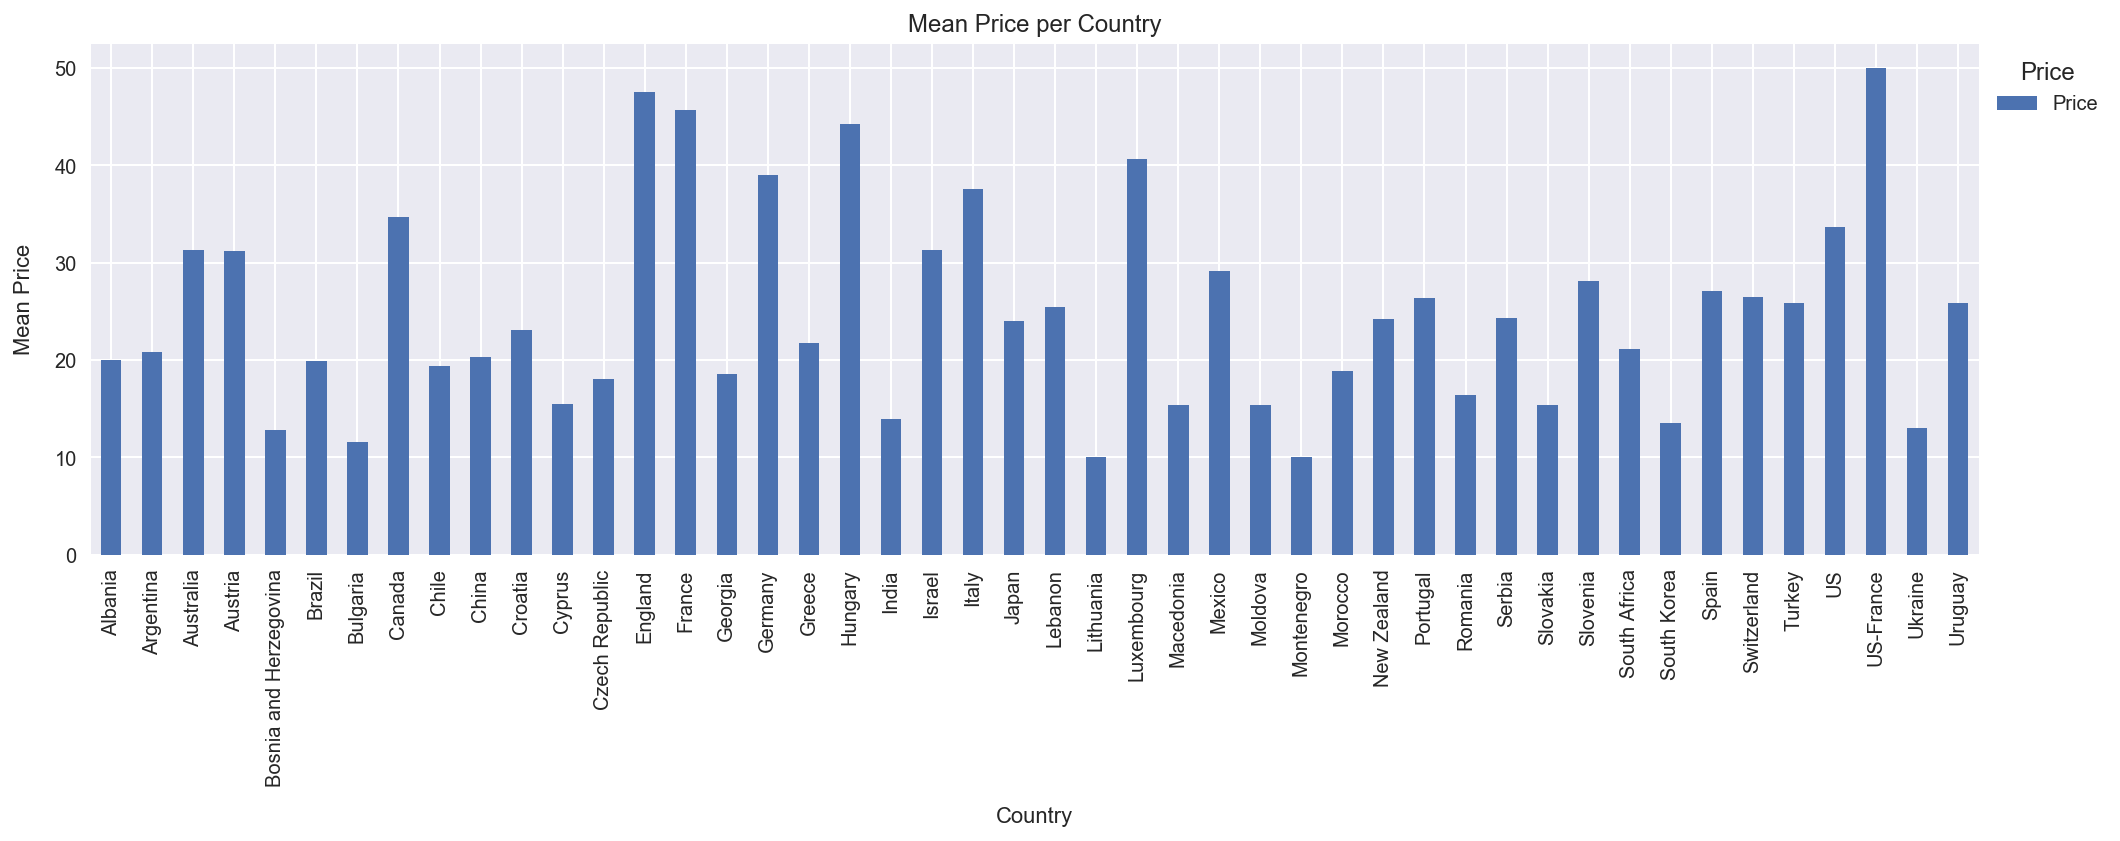

In [50]:
fig, ax = plt.subplots(figsize=(14, 6))

reviews_df.groupby(reviews_df['Country'])['Price'].mean().plot.bar()
mean_price = reviews_df["Price"].mean(0)
reviews_df["Price"].fillna(mean_price)

# Creates labels
ax.set_xlabel('Country')
ax.set_ylabel('Mean Price')
# Sets the plot title
ax.set_title("Mean Price per Country")
ax.legend(bbox_to_anchor=(1, 1), loc=2, title='Price')

fig.tight_layout()

In [51]:
top_province = reviews_df['Province'].value_counts().head(1)
print("The province with the most reviews is {}".format(top_province))

The province with the most reviews is California    44355
Name: Province, dtype: int64


Wall time: 99.6 ms


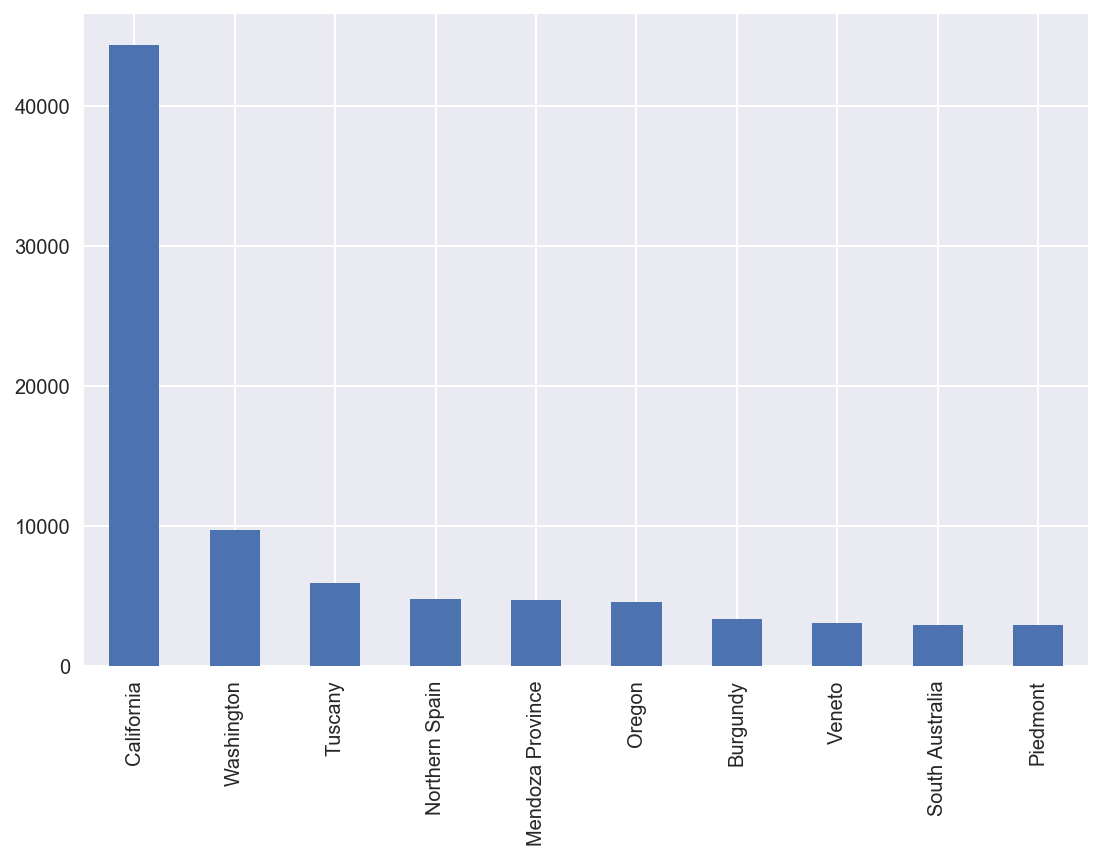

In [52]:
%%time
reviews_df['Province'].value_counts().head(10).plot.bar()

Wall time: 100 ms


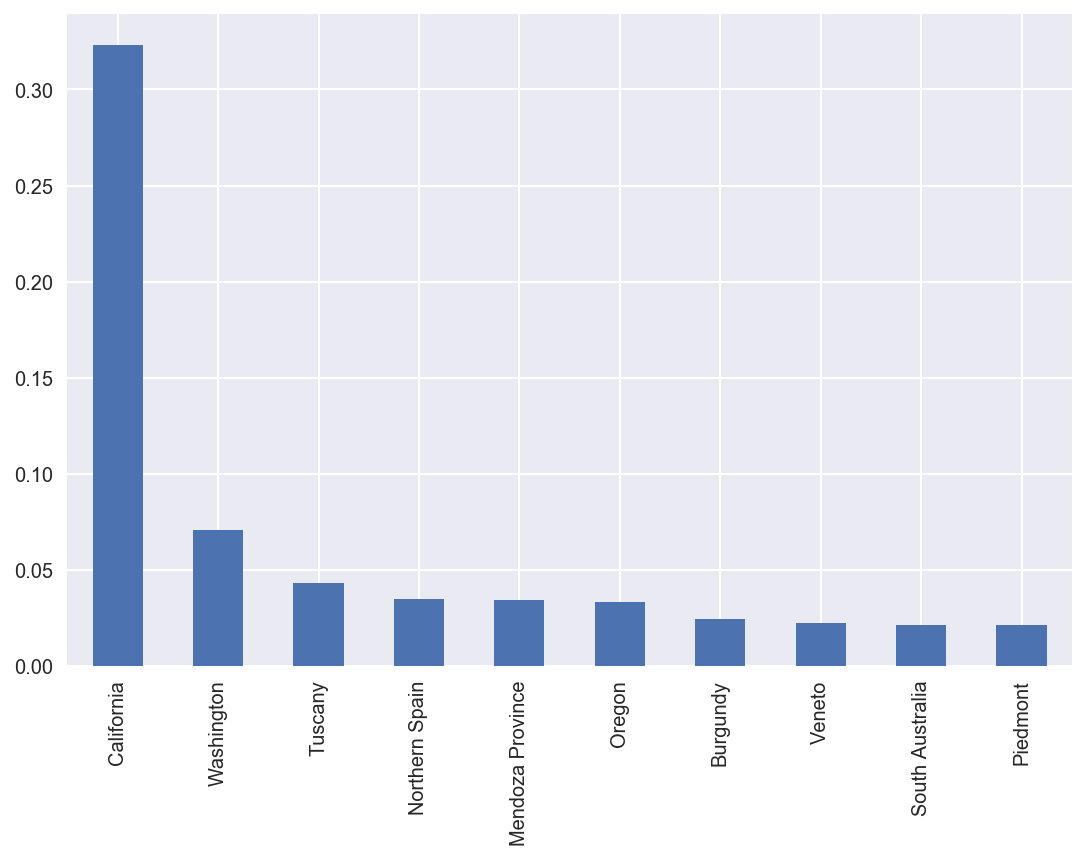

In [53]:
%%time
(reviews_df['Province'].value_counts().head(10) / len(reviews_df)).plot.bar()

Wall time: 105 ms


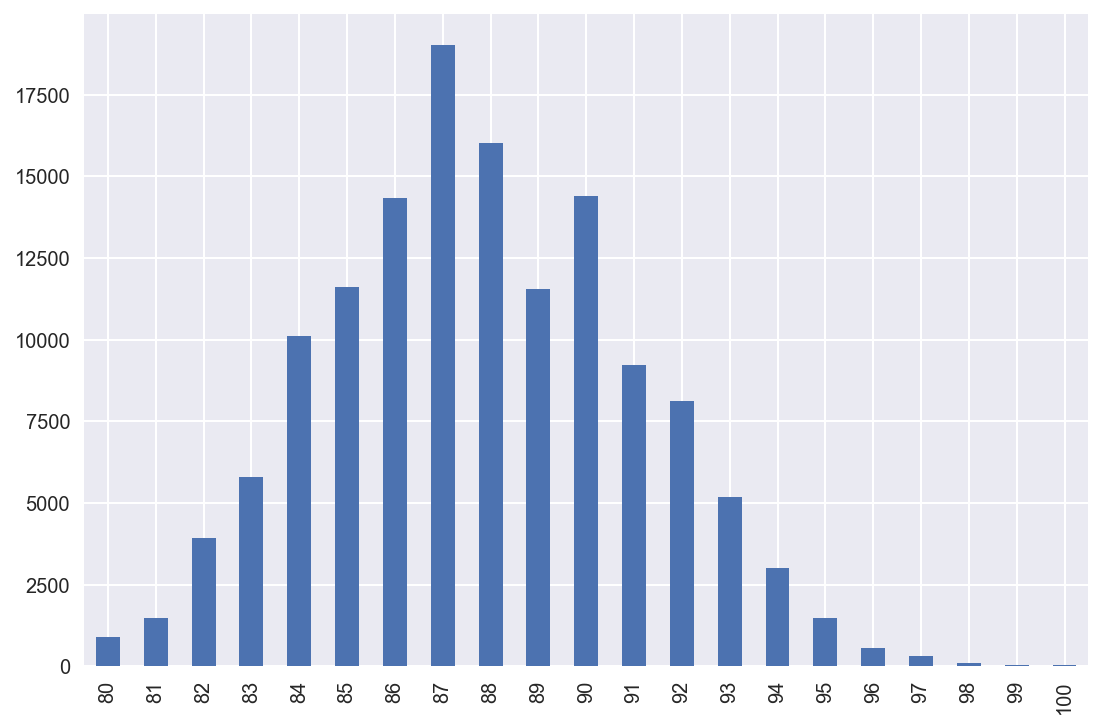

In [54]:
%%time
reviews_df['Points'].value_counts().sort_index().plot.bar()

Wall time: 89.8 ms


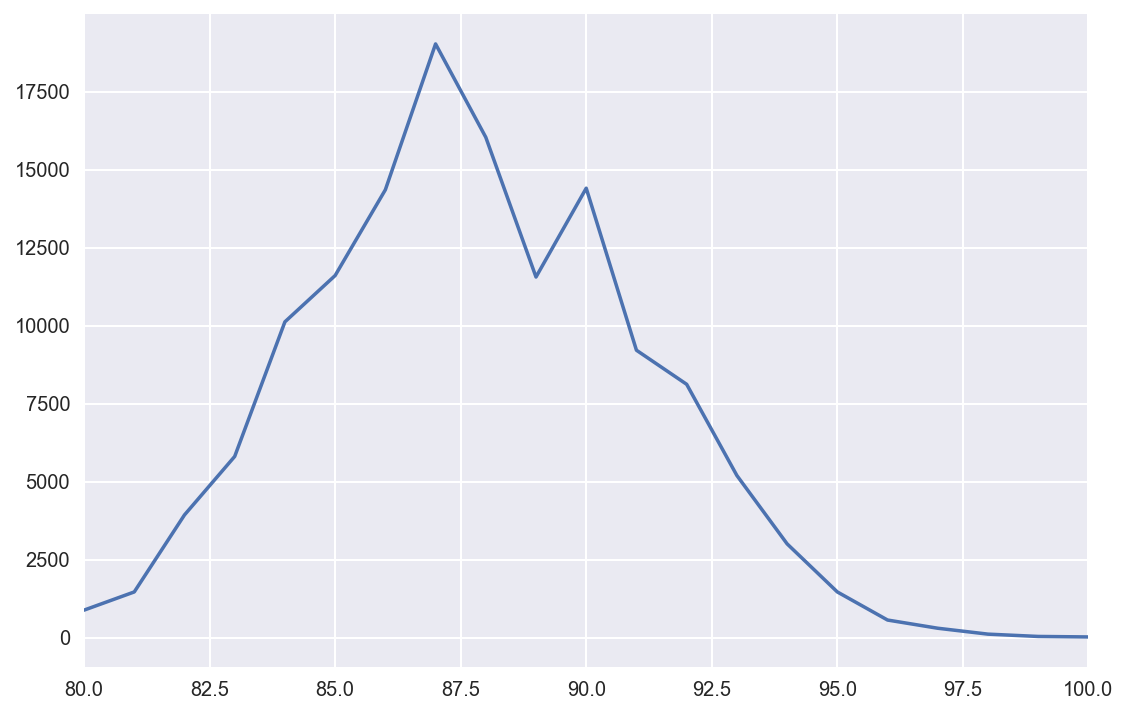

In [55]:
%%time
reviews_df['Points'].value_counts().sort_index().plot.line()

# Seaborn

### Countplot

The ```pandas``` bar chart becomes a ```seaborn``` countplot.


Wall time: 105 ms


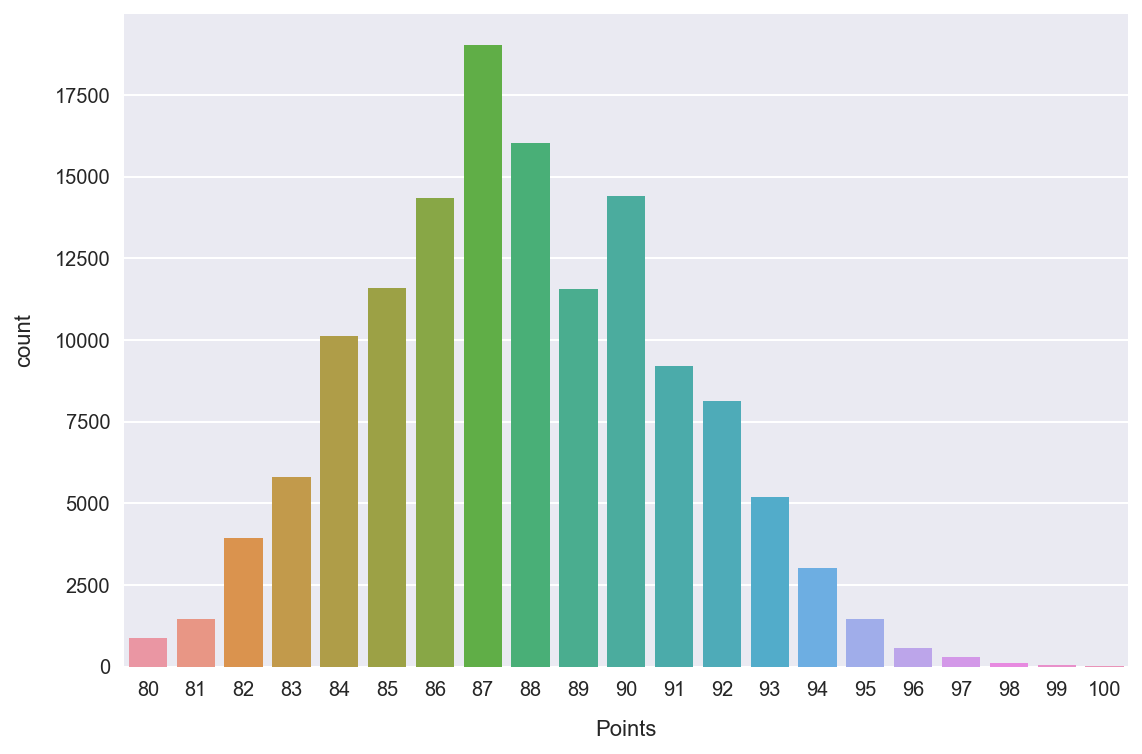

In [56]:
%%time
sns.countplot(reviews_df['Points'])

### Kernel Density Estimation Plot

First, let's view a ```jointplot()``` of price and points.  This will help us verify that the KDE plot is accurate.

A joint plot with Price vs. Points.
The model predicts that a $55.00 bottle of wine is most likely to always have the highest average 
rating of 87.5 points or better.


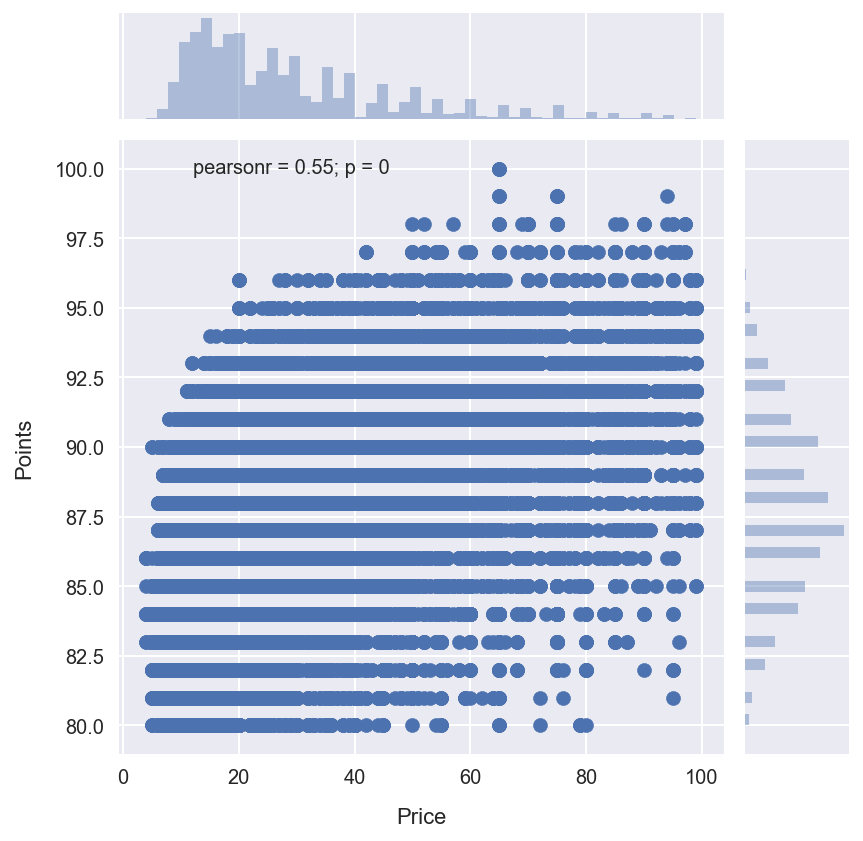

In [57]:
# Jointplot
print("A joint plot with Price vs. Points.")
print("The model predicts that a $55.00 bottle of wine " +
      "is most likely to always have the highest average \nrating of 87.5 points or better.")
sns.jointplot(x='Price', y='Points', data=reviews_df[reviews_df['Price'] < 100])

Wall time: 3.94 s


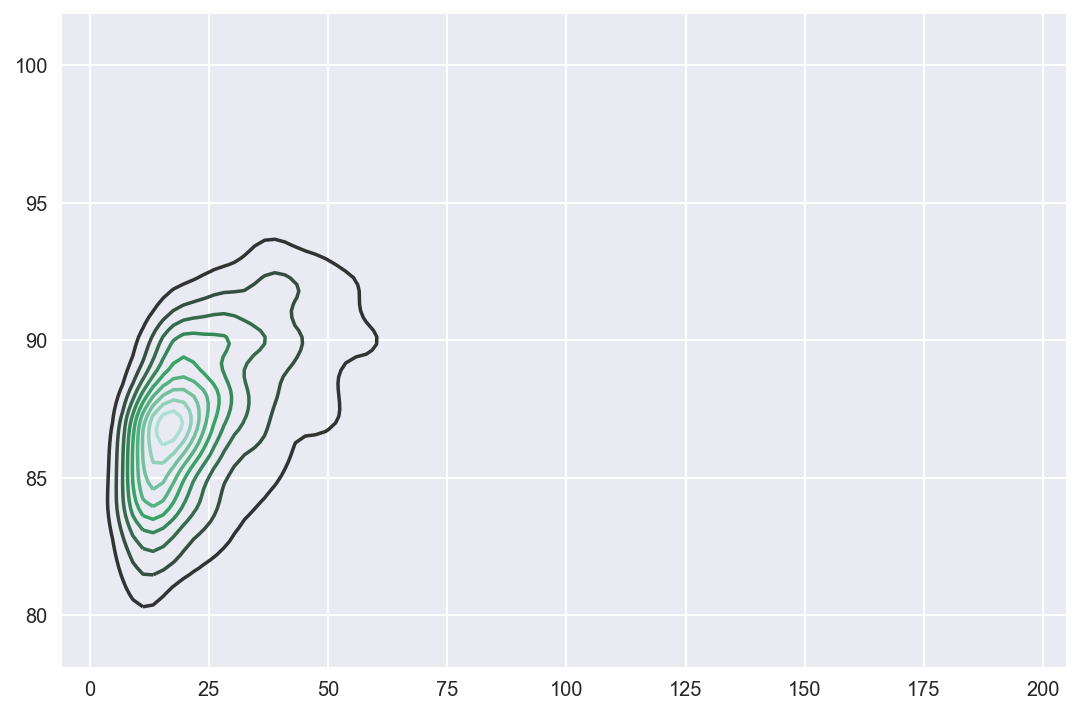

In [58]:
%%time
sns.kdeplot(reviews_df[reviews_df['Price'] < 200].loc[:, ['Price', 'Points']].dropna().sample(5000))

The Hex Grid illustrates the $55.00 bottle of wine is 


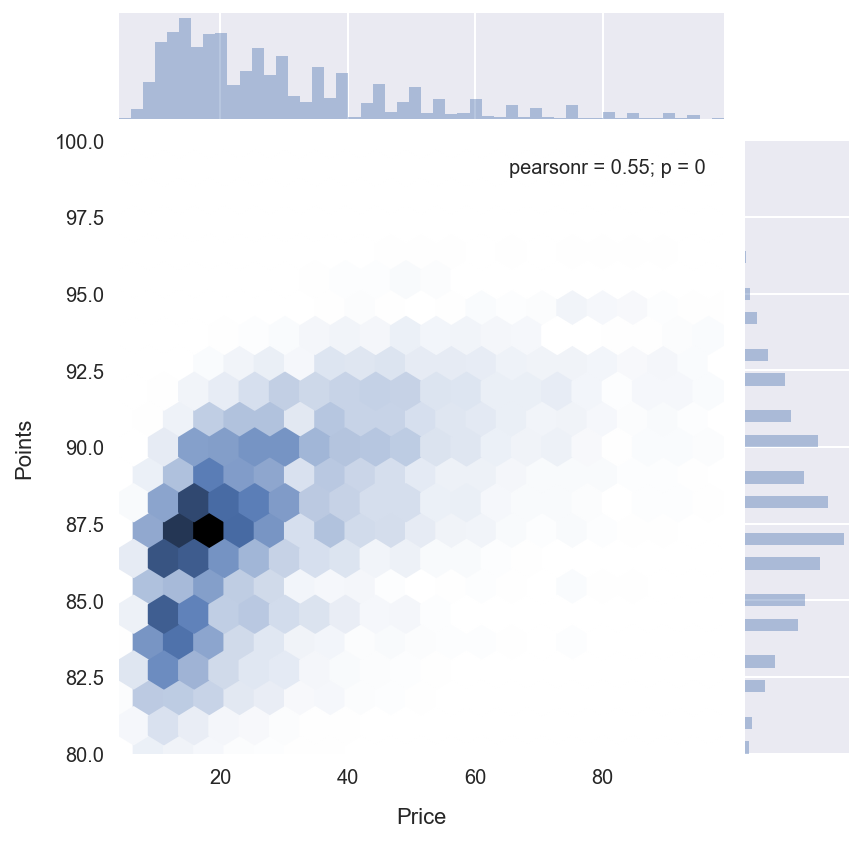

In [59]:
# Hex grid
print("The Hex Grid illustrates the $55.00 bottle of wine" +
      " is ")
sns.jointplot(x='Price', y='Points', data=reviews_df[reviews_df['Price'] < 100], kind='hex', 
              gridsize=20)

The Hex Grid illustrates the $55.00 bottle of wine is 


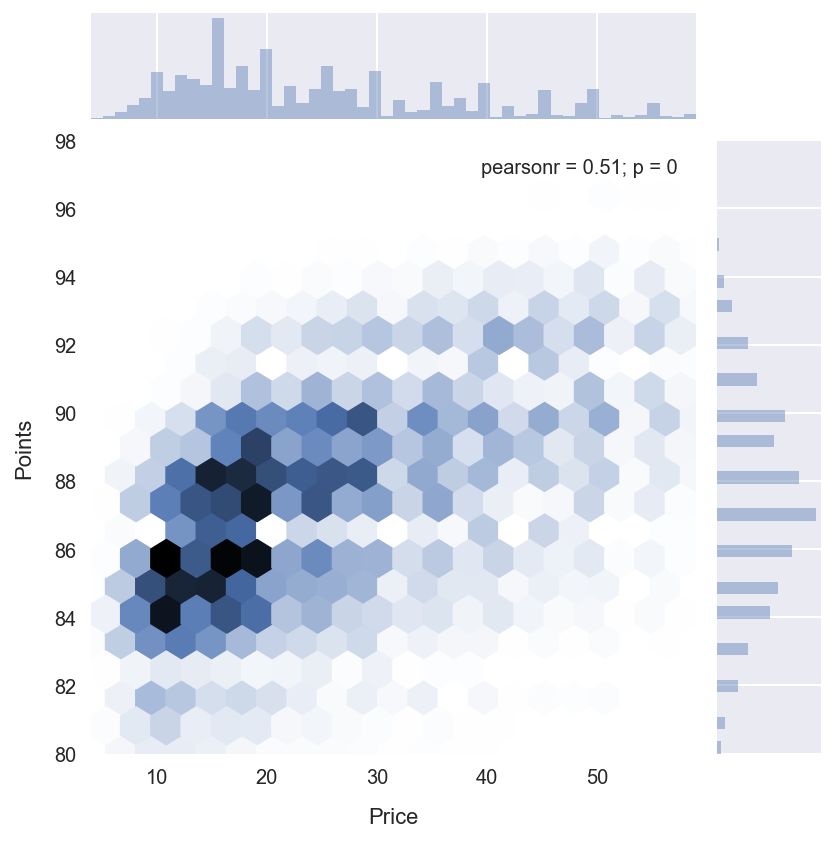

In [60]:
# Hex grid
print("The Hex Grid illustrates the $55.00 bottle of wine" +
      " is ")
sns.jointplot(x='Price', y='Points', data=reviews_df[reviews_df['Price'] < 60], kind='hex', 
              gridsize=20)

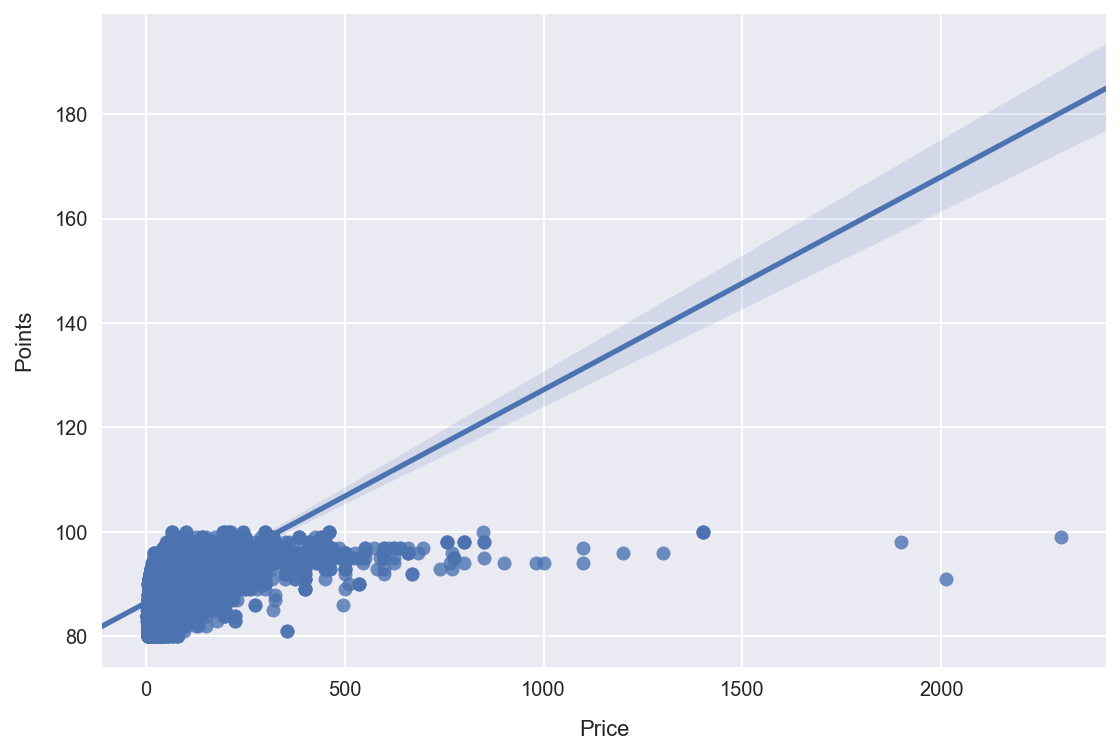

In [90]:
# Line of best fit (Linear regression)
ax = sns.regplot(x="Price", y="Points", data=reviews_df)

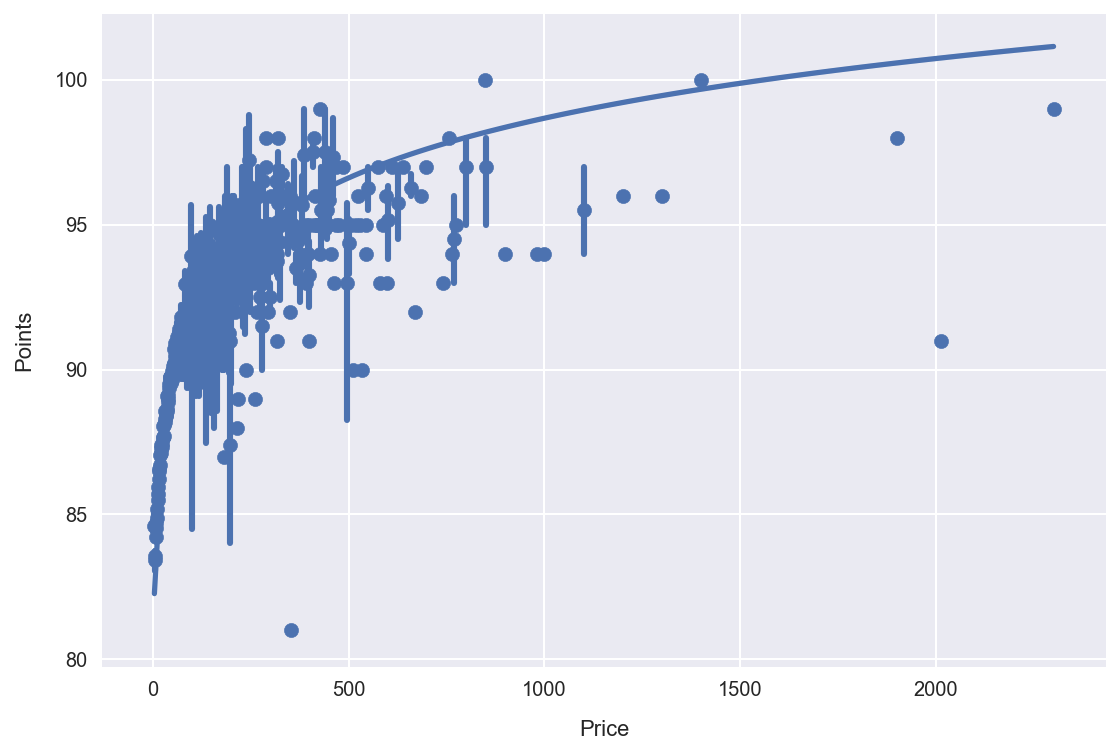

In [63]:
ax = sns.regplot(x=reviews_df["Price"], y="Points", data=reviews_df, x_estimator=np.mean, logx=True, truncate=True)

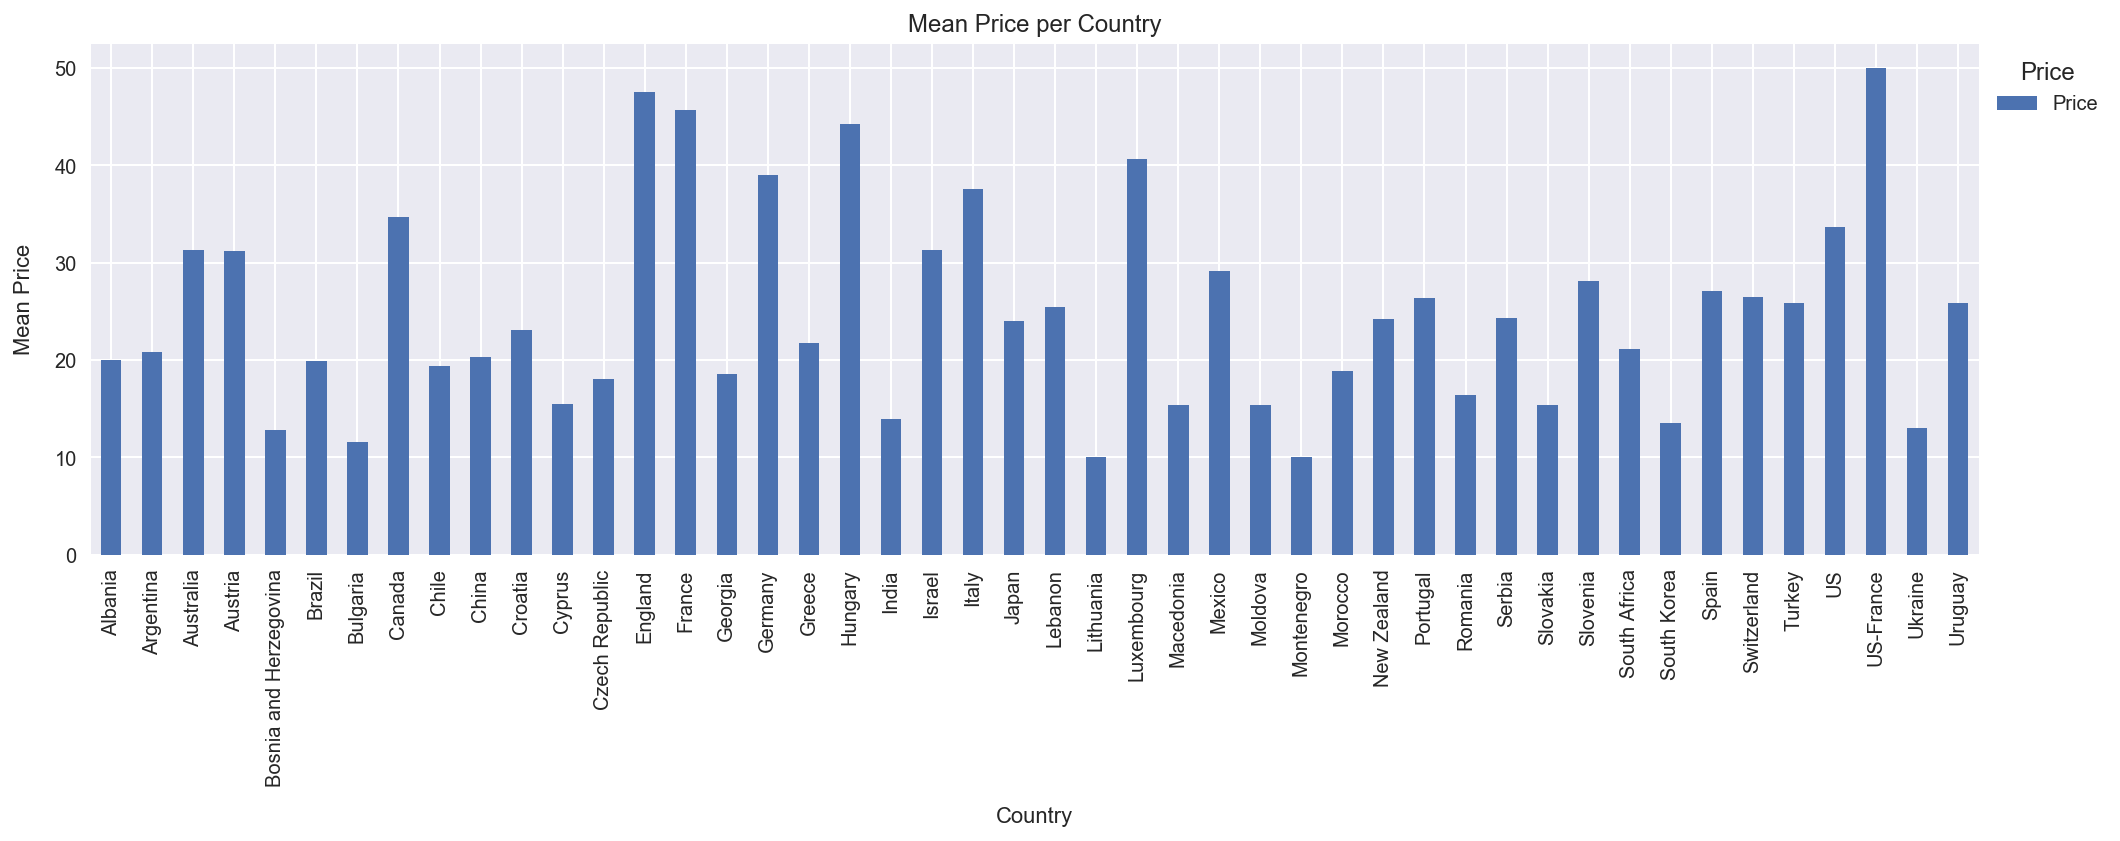

In [64]:
fig, ax = plt.subplots(figsize=(14, 6))

reviews_df.groupby(reviews_df['Country'])['Price'].mean().plot.bar()
mean_price = reviews_df["Price"].mean(0)
reviews_df["Price"].fillna(mean_price)

# Creates labels
ax.set_xlabel('Country')
ax.set_ylabel('Mean Price')
# Sets the plot title
ax.set_title("Mean Price per Country")
ax.legend(bbox_to_anchor=(1, 1), loc=2, title='Price')

fig.tight_layout()

# 3.0 Interpret the Data

![Python_Pura_Vida](https://user-images.githubusercontent.com/19881320/54723911-6588d580-4b3f-11e9-8de5-e9d9f5f34f45.jpg)

## Contact Information

William Ponton: [LinkedIn](https://www.linkedin.com/in/williampontoncfsp/) 

Email: [@gorbulus](waponton@gmail.com)

REPL: [@gorbulus](https://repl.it/@gorbulus)

Github: [gorbulus](https://github.com/gorbulus)

![Python_3](https://user-images.githubusercontent.com/19881320/54723915-67529900-4b3f-11e9-8a94-0424e55da789.jpg)